**CS 5834, Fall 2020: Intro to Urban Computing Project - Association Rules analysis for Gentrification using Atlanta Data Set**




### Imports and Mount File Directories


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you project is stored
customized_path_to_homework = "/content/drive/My Drive/cs5834/urbcomp_fall2020/project"
file_name = "Atlanta_typology_output.csv"

sys.path.append(customized_path_to_homework)

In [3]:
%cd $customized_path_to_homework/data

/content/drive/My Drive/cs5834/urbcomp_fall2020/project/data


In [4]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
import warnings


In [5]:

"""
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import nyctaxi_helpers
warnings.filterwarnings('ignore')
"""

"\nsys.path.insert(0,'../')\n%load_ext autoreload\n%autoreload 2\nimport nyctaxi_helpers\nwarnings.filterwarnings('ignore')\n"

In [6]:
pip install --upgrade mlxtend


Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)


In [7]:
#ref https://pbpython.com/market-basket-analysis.html


#may need to install mlxtend package - pip install mlxtend in console
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# **Process Urban Displacement Model Data for Gentrificaiton**


Reference: https://www.urbandisplacement.org/open-source-project

Based on the work https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/past/13-310.pdf?_ga=2.269282425.968981409.1605209194-851335111.1605209194

**Developing a New
Methodology for Analyzing
Potential Displacement**

University of California, Berkeley

Principal Investigator:
Karen Chapple 

https://ww3.arb.ca.gov/research/single-project.php?row_id=65188

**Obtain the Data**

Data can be found at https://github.com/urban-displacement/displacement-typologies/blob/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [8]:
#!wget -nc https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [9]:
## Process Data - if data file already processed then can start at Associaton Rules section
# get the Data File

df = pd.read_csv("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name), index_col=0)
#df = pd.read_csv("{}/data/{}".format(customized_path_to_homework, file_name), index_col=0)

# sneak peak in the data
df.head(10)


,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,total_25_col_bd_18,total_25_col_md_18,total_25_col_pd_18,total_25_col_phd_18,tot_units_built_18,units_40_49_built_18,units_39_early_built_18,ohu_18,rhu_18,mmhcosts_18,iinc_18,mov_wc_w_income_18,mov_wc_9000_18,mov_wc_15000_18,mov_wc_25000_18,mov_wc_35000_18,mov_wc_50000_18,mov_wc_65000_18,mov_wc_75000_18,mov_wc_76000_more_18,mov_oc_w_income_18,mov_oc_9000_18,mov_oc_15000_18,mov_oc_25000_18,state_x,county_x,tract_x,mov_oc_35000_18,mov_oc_50000_18,mov_oc_65000_18,mov_oc_75000_18,...,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,GEOID,rail,presence_ph_LIHTC,vul_gent_90,vul_gent_00,vul_gent_18,hotmarket_00,hotmarket_18,gent_90_00,gent_90_00_urban,gent_00_18,gent_00_18_urban,dp_PChRent,dp_RentGap,tr_rent_gap,rm_rent_gap,dense,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,7183.0,380.0,2666.0,40397.0,84000.0,7475.0,1021.0,56.0,4509.0,305.0,168.0,66.0,42.0,2953.0,44.0,0.0,1095.0,1571.0,982.0,27538.0,508.0,69.0,0.0,111.0,262.0,23.0,43.0,0.0,0.0,398.0,104.0,41.0,25.0,13,63,40515,0.0,158.0,0.0,70.0,...,0,1,1,0,0,1,0,0,0,1,13063040515,0,True,0,1,1,1.0,0.0,0,0,0,0,0,0,-13.333781,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
1,6225.0,898.0,2148.0,31463.0,59600.0,29094.0,830.0,90.0,3468.0,236.0,93.0,0.0,0.0,2649.0,33.0,68.0,556.0,1592.0,806.0,22562.0,377.0,38.0,56.0,64.0,69.0,129.0,0.0,21.0,0.0,196.0,0.0,0.0,33.0,13,63,40611,78.0,38.0,47.0,0.0,...,0,1,1,0,0,1,0,1,0,1,13063040611,0,True,1,1,1,1.0,0.0,0,1,0,0,0,1,149.122143,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
2,7827.0,1297.0,2023.0,34619.0,83700.0,6884.0,817.0,98.0,4842.0,317.0,215.0,52.0,28.0,2284.0,22.0,116.0,787.0,1236.0,833.0,20029.0,650.0,255.0,89.0,78.0,172.0,35.0,9.0,4.0,8.0,580.0,206.0,25.0,80.0,13,63,40612,25.0,198.0,28.0,0.0,...,0,1,1,1,0,1,0,0,0,1,13063040612,0,False,1,1,1,1.0,0.0,0,0,0,0,0,1,256.727016,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
3,6116.0,680.0,1879.0,50029.0,102500.0,10247.0,1029.0,85.0,3784.0,523.0,144.0,0.0,16.0,2100.0,10.0,0.0,1038.0,841.0,985.0,27690.0,422.0,48.0,60.0,51.0,46.0,188.0,29.0,0.0,0.0,177.0,0.0,0.0,22.0,13,63,40409,49.0,84.0,22.0,0.0,...,0,1,1,0,0,1,0,0,0,0,13063040409,0,False,1,1,1,1.0,0.0,0,0,0,0,0,0,-1.079521,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
4,7106.0,727.0,2387.0,49381.0,87700.0,9052.0,904.0,122.0,4982.0,478.0,77.0,45.0,80.0,2619.0,55.0,0.0,1656.0,731.0,935.0,25757.0,256.0,37.0,39.0,53.0,10.0,41.0,76.0,0.0,0.0,333.0,95.0,62.0,100.0,13,63,40410,19.0,28.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1,13063040410,0,False,1,1,1,1.0,1.0,0,0,0,0,0,1,139.783406,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
5,4554.0,145.0,1552.0,59583.0,95600.0,10039.0,1143.0,55.0,3074.0,360.0,342.0,15.0,106.0,1819.0,0.0,21.0,1075.0,477.0,1085.0,27415.0,61.0,15.0,0.0,29.0,0.0,17.0,0.0,0.0,0.0,139.0,22.0,0.0,16.0,13,63,40509,25.0,49.0,27.0,0.0,...,0,1,1,1,0,1,0,0,0,0,13063040509,0,False,1,0,1,1.0,0.0,0,0,0,0,0,0,-170.919924,20.207763,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0,1.0,7.0,['ARE']
6,3931.0,443.0,1224.0,48298.0,94400.0,11675.0,1048.0,78.0,2318.0,271.0,73.0,0.0,5.0,1420.0,51.0,39.0,851.0,373.0,1058.0,21360.0,308.0,67.0,73.0,60.0,28.0,65.0,15.0,0.0,0.0,112.0,15.0,30.0,15.0,13,63,40407,0.0,28.0,11.0,0.0,...,0,1,1,1,0,1,0,0,1,1,13063040407,0,False,1,1,1,1.0,0.0,0,0,0,0,0,0,-114.823493,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
7,5366.0,407.0,1654.0,43172.0,70000.0,10637.0,1047.0,54.0,3270.0,230.0,145.0,28.0,0.0,1931.0,0.0,31.0,670.0,984.0,1002.0,20766.0,300.0,77.0,74.0,82.0,19.0,31.0,0.0,0.0,17.0,240.0,43.0,52.0,70.0,13,63,40518,20.0,39.0,7.0,0.0,...,0,1,1,0,0,1,0,0,0,1,13063040518,0,True,0,1,1,1.0,0.0,0,0,0,0,1,1,87.127856,20.20776

In [10]:
df.columns

Index(['pop_18', 'white_18', 'hh_18', 'hinc_18', 'mhval_18', 'mhval_18_se',
       'mrent_18', 'mrent_18_se', 'total_25_18', 'total_25_col_bd_18',
       ...
       'BE', 'SMMI', 'ARG', 'EOG', 'OD', 'OD_loss', 'LISD', 'double_counted',
       'typology', 'typ_cat'],
      dtype='object', length=305)

In [11]:
"""
# create a working copy of the data to process
df2 = df.copy()

#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',
df2 = df2[[ 'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',
 'per_col_90',
 'per_col_00',
 'per_col_18',
 'per_units_pre50_18',
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',
 'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',
 'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_hinc_90_00',
 'pctch_real_mrent_00_18',
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]


# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)
"""

"\n# create a working copy of the data to process\ndf2 = df.copy()\n\n#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',\ndf2 = df2[[ 'inc80_18',\n 'inc120_18',\n 'inc80_00',\n 'inc120_00',\n 'inc80_90',\n 'low_80120_18',\n 'mod_80120_18',\n 'high_80120_18',\n 'low_pdmt_medhhinc_18',\n 'high_pdmt_medhhinc_18',\n 'mod_pdmt_medhhinc_18',\n 'mix_low_medhhinc_18',\n 'mix_mod_medhhinc_18',\n 'mix_high_medhhinc_18',\n\n 'low_80120_00',\n 'mod_80120_00',\n 'high_80120_00',\n 'low_pdmt_medhhinc_00',\n 'high_pdmt_medhhinc_00',\n 'mod_pdmt_medhhinc_00',\n 'mix_low_medhhinc_00',\n 'mix_mod_medhhinc_00',\n 'mix_high_medhhinc_00',\n\n 'per_all_li_90',\n 'per_all_li_00',\n 'per_all_li_18',\n 'per_nonwhite_90',\n 'per_nonwhite_00',\n 'per_nonwhite_18',\n 'per_rent_90',\n 'per_rent_00',\n 'per_rent_18',\n 'per_col_90',\n 'per_col_00',\n 'per_col_18',\n 'per_units_pre50_18',\n 'per_limove_18',\n 'per_limove_12',\n 'lmh_flag_category',\n 'pctch_real_mhval_00_18',\n 'pctch_real_mrent_1

In [12]:
# create a working copy of the data to process
df2 = df.copy()

"""
removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00', 
'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
  'per_col_90',
 'per_col_00',
 'per_col_18',
  'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
  'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_mrent_00_18',
 'per_units_pre50_18',
  
"""

df2.head(10)
df2 = df2[[ 

 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',

 
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',

 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',

 'pctch_real_hinc_90_00',
 
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]

# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)

,low_80120_18,mod_80120_18,high_80120_18,low_pdmt_medhhinc_18,high_pdmt_medhhinc_18,mod_pdmt_medhhinc_18,mix_low_medhhinc_18,mix_mod_medhhinc_18,mix_high_medhhinc_18,low_80120_00,mod_80120_00,high_80120_00,low_pdmt_medhhinc_00,high_pdmt_medhhinc_00,mod_pdmt_medhhinc_00,mix_low_medhhinc_00,mix_mod_medhhinc_00,mix_high_medhhinc_00,per_all_li_90,per_all_li_00,per_all_li_18,per_nonwhite_90,per_nonwhite_00,per_nonwhite_18,per_rent_90,per_rent_00,per_rent_18,per_limove_18,per_limove_12,lmh_flag_category,pctch_real_mhval_00_18,pctch_real_mrent_12_18,rent_decrease,rent_marginal,rent_increase,rent_rapid_increase,house_decrease,house_marginal,house_increase,house_rapid_increase,...,ch_per_limove_12_18,aboverm_per_all_li_90,aboverm_per_all_li_00,aboverm_per_all_li_18,aboverm_per_nonwhite_18,aboverm_per_nonwhite_90,aboverm_per_nonwhite_00,aboverm_per_rent_90,aboverm_per_rent_00,aboverm_per_rent_18,aboverm_per_col_90,aboverm_per_col_00,aboverm_per_col_18,aboverm_real_mrent_90,aboverm_real_mrent_00,aboverm_real_mrent_12,aboverm_real_mrent_18,aboverm_real_mhval_90,aboverm_real_mhval_00,aboverm_real_mhval_18,aboverm_pctch_real_mhval_00_18,aboverm_pctch_real_mrent_00_18,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,rail,presence_ph_LIHTC,hotmarket_00,hotmarket_18,dp_PChRent,dp_RentGap,dense,typology
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13063040515,0.633648,0.197877,0.168475,1.0,0.0,0.0,0.0,0.0,0.0,0.236020,0.209682,0.554298,0.0,1.0,0.0,0.0,0.0,0.0,0.063608,0.236020,0.633648,0.190688,0.771742,0.947097,0.310152,0.304853,0.589272,0.441959,0.414119,aff_mix_low,-0.388620,-0.019382,0,1,0,0,1,0,0,0,...,0.027840,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,True,1.0,0.0,0,0,0,1.0
13063040611,0.702077,0.190240,0.107683,1.0,0.0,0.0,0.0,0.0,0.0,0.399012,0.252283,0.348705,0.0,0.0,0.0,0.0,1.0,0.0,0.169189,0.399012,0.702077,0.183068,0.566280,0.855743,0.494101,0.621031,0.741155,0.438367,0.524124,aff_predominantly_LI,-0.458216,-0.018704,0,1,0,0,1,0,0,0,...,-0.085757,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,True,1.0,0.0,0,1,0,3.0
13063040612,0.690657,0.094531,0.214812,1.0,0.0,0.0,0.0,0.0,0.0,0.312276,0.267979,0.419745,0.0,0.0,0.0,0.0,1.0,0.0,0.305639,0.312276,0.690657,0.182998,0.487968,0.834292,0.493852,0.338013,0.610974,0.603110,0.810225,aff_predominantly_LI,-0.325497,-0.197343,1,0,0,0,1,0,0,0,...,-0.207115,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,False,1.0,0.0,0,1,0,3.0
13063040409,0.527501,0.233772,0.238727,0.0,0.0,0.0,1.0,0.0,0.0,0.246515,0.160240,0.593244,0.0,1.0,0.0,0.0,0.0,0.0,0.074365,0.246515,0.527501,0.202345,0.614093,0.888816,0.412476,0.272120,0.447578,0.325759,0.604707,aff_mix_mod,-0.245569,-0.055018,1,0,0,0,1,0,0,0,...,-0.278948,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,False,1.0,0.0,0,0,0,1.0
13063040410,0.537279,0.159060,0.303661,0.0,0.0,0.0,1.0,0.0,0.0,0.359065,0.235276,0.405659,0.0,0.0,0.0,0.0,1.0,0.0,0.124202,0.359065,0.537279,0.187415,0.591455,0.897692,0.196395,0.303785,0.306242,0.652835,0.697661,aff_predominantly_LI,-0.174298,0.064594,0,0,1,0,1,0,0,0,...,-0.044826,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,False,1.0,1.0,0,1,0,1.0
13063040509,0.438380,0.210569,0.351052,0.0,0.0,0.0,0.0,1.0,0.0,0.139891,0.172815,0.687294,0.0,1.0,0.0,0.0,0.0,0.0,0.195394,0.139891,0.438380,0.625250,0.886230,0.968160,0.655452,0.132575,0.307345,0.431550,0.509741,aff_predominantly_MI,-0.392829,-0.085498,1,0,0,0,1,0,0,0,...,-0.078192,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,False,1.0,0.0,0,0,0,7.0
13063040407,0.588523,0.255260,0.156216,1.0,0.0,0.0,0.0,0.0,0.0,0.341019,0.225017,0.433964,0.0,0.0,0.0,0.0,1.0,0.0,0.286585,0.341019,0.588523,0.205398,0.501394,0.887306,0.410972,0.225358,0.304739,

Correlation Heatmap

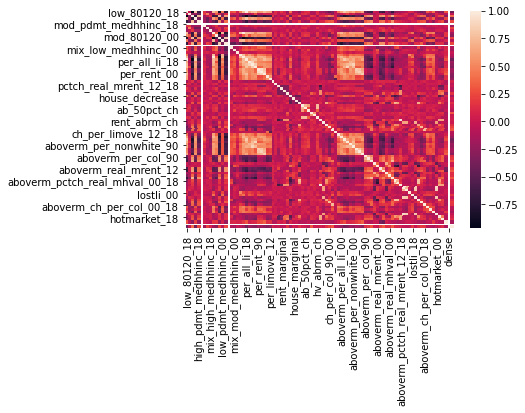

In [13]:
import seaborn as sns

sns.heatmap(df2.corr())

In [14]:
#df2.corr()['inc80_18'] > 0.9


In [15]:
#ref: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [16]:
to_drop

['high_80120_18',
 'high_80120_00',
 'per_all_li_00',
 'per_all_li_18',
 'aboverm_pctch_real_mrent_12_18']

In [17]:
# Drop features 
#df2.drop(df[to_drop], axis=1)

### Convert select continous variables to categorical and one hot encode 

In [18]:
# convert already dummy variables from float to int
dummy_var_list = ['hotmarket_00', 'hotmarket_18', 'low_pdmt_medhhinc_00', 'high_pdmt_medhhinc_00', 'mod_pdmt_medhhinc_00',
                  'mix_low_medhhinc_00', 'mix_mod_medhhinc_00',  'mix_high_medhhinc_00', 'low_pdmt_medhhinc_18', 'high_pdmt_medhhinc_18',
                  'mod_pdmt_medhhinc_18', 'mix_low_medhhinc_18', 'mix_mod_medhhinc_18', 'mix_high_medhhinc_18', 'presence_ph_LIHTC',
                  'typology']
for dummycol in dummy_var_list:
  df2.loc[:,(dummycol)] = df2[dummycol].astype(int, copy=False)

In [19]:
# use float variables to represent each categorical variable by dividing into quartiles
def convert_percents_to_dummy_vars(X):

    columns = X.columns

    bin_labels_4 = ['VL', 'L', 'H',  'VH']


    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='float64':
          print("Processing: " + columns[i])

          X[columns[i]] = X[columns[i]].fillna(0)
          cat_label = "{}_cat".format(columns[i])
          dummy_label = "{}_dummy".format(columns[i])
          X[cat_label] = pd.qcut(X[columns[i]], 
                                 4,
                              precision=5,
                              duplicates = 'drop',
                              labels=bin_labels_4)
          X = pd.get_dummies(X, columns=[cat_label], prefix=[dummy_label])
          X = X.drop([columns[i]], axis=1)

    return X

In [20]:
# check if categorical then convert to dummy using label and onehot encoding
def convert_categorical_to_dummy_vars(X):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder    

    columns = X.columns
    indices = X.index
    new_columns = []
    encoded_x = None

    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='O':
          print("Processing: " + columns[i])


          label_encoder = LabelEncoder()
          le = label_encoder.fit(X[columns[i]].apply(str))
          for class_ in le.classes_:
              new_columns.append("{}_{}".format(columns[i],class_))
              
          feature = le.transform(X[columns[i]].apply(str))
          feature = feature.reshape(X.shape[0], 1)
          onehot_encoder = OneHotEncoder(sparse=False)
          onehot_encoder.fit(feature)
          feature = onehot_encoder.transform(feature)
          if encoded_x is None:
              encoded_x = feature
          else:
              encoded_x = np.concatenate((encoded_x, feature), axis=1)
          X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)

    X = pd.DataFrame(np.concatenate((encoded_x,X),axis=1),index=indices,columns=new_columns)
    
    return X


### Convert Percentage (floats) to Quartiles and Dummy Variables 

In [21]:
# process and save data all converted to one hot encoding
df2 = convert_percents_to_dummy_vars(df2)





Processing: low_80120_18
Processing: mod_80120_18
Processing: high_80120_18
Processing: low_80120_00
Processing: mod_80120_00
Processing: high_80120_00
Processing: per_all_li_90
Processing: per_all_li_00
Processing: per_all_li_18
Processing: per_nonwhite_90
Processing: per_nonwhite_00
Processing: per_nonwhite_18
Processing: per_rent_90
Processing: per_rent_00
Processing: per_rent_18
Processing: per_limove_18
Processing: per_limove_12
Processing: pctch_real_mhval_00_18
Processing: pctch_real_mrent_12_18
Processing: per_ch_zillow_12_18
Processing: pctch_real_hinc_90_00
Processing: pctch_real_hinc_00_18
Processing: ch_per_col_90_00
Processing: ch_per_col_00_18
Processing: ch_per_limove_12_18


In [22]:
df2 = convert_categorical_to_dummy_vars(df2)


Processing: lmh_flag_category
Processing: change_flag_category


iii. Save the dataset as a CSV file. The first line of the CSV file should be the attribute
names as described in the previous question. 

In [23]:
df2.to_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name))

# **Association Rule Calculations**


In [24]:
#load already processed data 
df3 = pd.read_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name), index_col=0)
df3 = df3.astype(int)


In [59]:
confidence_cut = 0.8
lift_cut = 1.0
conviction_cut = 0.9
support_cut = 0.6

# Associaton Rules Analysis - Gentrified

In [26]:
gent_class = 'gent'

In [27]:

df_class = df3[df3['typology'].isin(['4', '5','99'])].drop(['typology'], axis=1)


In [28]:
df_class = df_class.astype(bool)


In [29]:
frequent_itemsets = fpgrowth(df_class, min_support= support_cut, use_colnames=True, verbose=1)
#%timeit  frequent_itemsets_gent = apriori(df_gent, min_support=0.07, use_colnames=True, verbose=1, low_memory=False)

8191 itemset(s) from tree conditioned on items ()


In [30]:
frequent_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [31]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)



### Gentrification Calculate Rule Metrics

In [32]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [33]:
frequent_itemsets.head(10)

,support,itemsets
0,1.0,(per_nonwhite_90_dummy_VH)
1,1.0,(per_all_li_00_dummy_VH)
2,1.0,(per_all_li_90_dummy_VH)
3,1.0,(high_80120_00_dummy_VL)
4,1.0,(low_80120_00_dummy_VH)
5,1.0,(hotmarket_18)
6,1.0,(aboverm_per_units_pre50_18)
7,1.0,(aboverm_ch_per_col_00_18)
8,1.0,(aboverm_pctch_real_hinc_00_18)
9,1.0,(aboverm_per_nonwhite_00)


In [34]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(per_nonwhite_90_dummy_VH),(per_all_li_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(per_all_li_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(per_all_li_90_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(per_nonwhite_90_dummy_VH),(per_all_li_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(per_nonwhite_90_dummy_VH),(high_80120_00_dummy_VL),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(high_80120_00_dummy_VL),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,(per_nonwhite_90_dummy_VH),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,(low_80120_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,(per_nonwhite_90_dummy_VH),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(hotmarket_18),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf


In [35]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**

In [36]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [37]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(per_nonwhite_90_dummy_VH),(per_all_li_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(per_all_li_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(per_all_li_90_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(per_nonwhite_90_dummy_VH),(per_all_li_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(per_nonwhite_90_dummy_VH),(high_80120_00_dummy_VL),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
1577935,(aboverm_per_all_li_90),"(low_80120_00_dummy_VH, aboverm_pctch_real_hin...",1.0,1.0,1.0,1.0,1.0,0.0,inf
1577936,(hotmarket_18),"(low_80120_00_dummy_VH, aboverm_pctch_real_hin...",1.0,1.0,1.0,1.0,1.0,0.0,inf
1577937,(aboverm_ch_per_col_00_18),"(low_80120_00_dummy_VH, aboverm_pctch_real_hin...",1.0,1.0,1.0,1.0,1.0,0.0,inf
1577938,(per_all_li_90_dummy_VH),"(low_80120_00_dummy_VH, aboverm_pctch_real_hin...",1.0,1.0,1.0,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Confidence ranges from 0 to 1. Confidence is an estimate of Pr(C | A), the
probability of observing C given A. After obtaining a rule set, one can immediatly
use confidence as a basis for classifying one new case x. Of all the rules that
apply to x (i.e., the rules whose antecedent is true in x), we choose the one
with highest confidence. This loosely follows the optimal Bayes classifier

In [38]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(per_nonwhite_90_dummy_VH),(per_all_li_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(per_all_li_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(per_all_li_90_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(per_nonwhite_90_dummy_VH),(per_all_li_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(per_nonwhite_90_dummy_VH),(high_80120_00_dummy_VL),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(high_80120_00_dummy_VL),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,(per_nonwhite_90_dummy_VH),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,(low_80120_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,(per_nonwhite_90_dummy_VH),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(hotmarket_18),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Conviction is another measure proposed in [4] to tackle some of the weaknesses of confidence and lift. Unlike lift, conviction is sensitive to rule direction
(conv(A → C) 6= conv(C → A)). Conviction is somewhat inspired in the logical
definition of implication and attempts to measure the degree of implication of
a rule. Conviction is infinite for logical implications (confidence 1), and is 1 if
A and C are independent

In [39]:
rules.nlargest(10, 'conviction')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(per_nonwhite_90_dummy_VH),(per_all_li_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(per_all_li_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(per_all_li_90_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(per_nonwhite_90_dummy_VH),(per_all_li_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(per_nonwhite_90_dummy_VH),(high_80120_00_dummy_VL),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(high_80120_00_dummy_VL),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,(per_nonwhite_90_dummy_VH),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,(low_80120_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,(per_nonwhite_90_dummy_VH),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(hotmarket_18),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Lift measures how far from independence are A and C. It ranges within
[0, +∞[. Values close to 1 imply that A and C are independent and the rule
is not interesting. 

In [40]:
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(per_nonwhite_90_dummy_VH),(per_all_li_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(per_all_li_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(per_all_li_90_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(per_nonwhite_90_dummy_VH),(per_all_li_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(per_nonwhite_90_dummy_VH),(high_80120_00_dummy_VL),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(high_80120_00_dummy_VL),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,(per_nonwhite_90_dummy_VH),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,(low_80120_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,(per_nonwhite_90_dummy_VH),(hotmarket_18),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(hotmarket_18),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf


In [41]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(per_nonwhite_90_dummy_VH),(per_all_li_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(per_all_li_00_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(per_all_li_90_dummy_VH),(per_nonwhite_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(per_nonwhite_90_dummy_VH),(per_all_li_90_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(per_nonwhite_90_dummy_VH),(high_80120_00_dummy_VL),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
95,(aboverm_per_nonwhite_90),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
96,(low_80120_00_dummy_VH),(aboverm_per_all_li_00),1.0,1.0,1.0,1.0,1.0,0.0,inf
97,(aboverm_per_all_li_00),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf
98,(aboverm_per_all_li_90),(low_80120_00_dummy_VH),1.0,1.0,1.0,1.0,1.0,0.0,inf


Plot Metrics

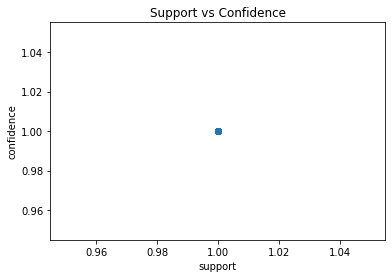

In [42]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

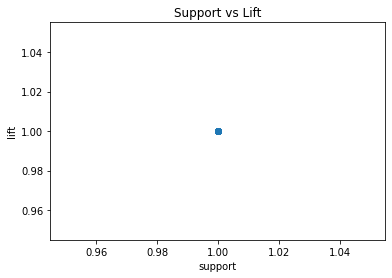

In [43]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


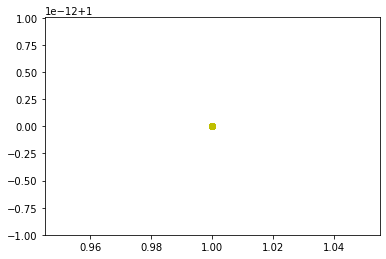

In [44]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# **Association Analysis - Non Gentrified**

In [60]:
gent_class = 'nongent'

In [61]:
df_class = df3[df3['typology'].isin(['1', '2', '3'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [62]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

17 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_18)
3 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_18)
3 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_00)
0 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_00, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_00, aboverm_per_nonwhite_18)
3 itemset(s) from tree conditioned on items (aboverm_per_nonwhite_00, aboverm_per_rent_18)
4 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_nonwhite_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_rent_18)
3 itemset(s) from tree conditioned on items (aboverm_per_a

In [63]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

### Non-Gentrification Calculate Rule Metrics

In [64]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [65]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_rent_18),1.000000,0.921569,0.921569,0.921569,1.000000,0.000000,1.000000
1,(aboverm_per_rent_18),(aboverm_per_all_li_18),0.921569,1.000000,0.921569,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.917647,0.917647,0.917647,1.000000,0.000000,1.000000
3,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.917647,1.000000,0.917647,1.000000,1.000000,0.000000,inf
4,(aboverm_per_nonwhite_18),(aboverm_per_rent_18),0.917647,0.921569,0.843137,0.918803,0.996999,-0.002537,0.965944
5,(aboverm_per_rent_18),(aboverm_per_nonwhite_18),0.921569,0.917647,0.843137,0.914894,0.996999,-0.002537,0.967647
6,"(aboverm_per_all_li_18, aboverm_per_nonwhite_18)",(aboverm_per_rent_18),0.917647,0.921569,0.843137,0.918803,0.996999,-0.002537,0.965944
7,"(aboverm_per_all_li_18, aboverm_per_rent_18)",(aboverm_per_nonwhite_18),0.921569,0.917647,0.843137,0.914894,0.996999,-0.002537,0.967647
8,"(aboverm_per_nonwhite_18, aboverm_per_rent_18)",(aboverm_per_all_li_18),0.843137,1.000000,0.843137,1.000000,1.000000,0.000000,inf
9,(aboverm_per_all_li_18),"(aboverm_per_nonwhite_18, aboverm_per_rent_18)",1.000000,0.843137,0.843137,0.843137,1.000000,0.000000,1.000000


In [66]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**




In [67]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [68]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_rent_18),1.000000,0.921569,0.921569,0.921569,1.000000,0.000000,1.000000
1,(aboverm_per_rent_18),(aboverm_per_all_li_18),0.921569,1.000000,0.921569,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.917647,0.917647,0.917647,1.000000,0.000000,1.000000
3,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.917647,1.000000,0.917647,1.000000,1.000000,0.000000,inf
4,(aboverm_per_nonwhite_18),(aboverm_per_rent_18),0.917647,0.921569,0.843137,0.918803,0.996999,-0.002537,0.965944
5,(aboverm_per_rent_18),(aboverm_per_nonwhite_18),0.921569,0.917647,0.843137,0.914894,0.996999,-0.002537,0.967647
6,"(aboverm_per_all_li_18, aboverm_per_nonwhite_18)",(aboverm_per_rent_18),0.917647,0.921569,0.843137,0.918803,0.996999,-0.002537,0.965944
7,"(aboverm_per_all_li_18, aboverm_per_rent_18)",(aboverm_per_nonwhite_18),0.921569,0.917647,0.843137,0.914894,0.996999,-0.002537,0.967647
8,"(aboverm_per_nonwhite_18, aboverm_per_rent_18)",(aboverm_per_all_li_18),0.843137,1.000000,0.843137,1.000000,1.000000,0.000000,inf
9,(aboverm_per_all_li_18),"(aboverm_per_nonwhite_18, aboverm_per_rent_18)",1.000000,0.843137,0.843137,0.843137,1.000000,0.000000,1.000000


In [69]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_rent_18),1.000000,0.921569,0.921569,0.921569,1.000000,0.000000,1.0
1,(aboverm_per_rent_18),(aboverm_per_all_li_18),0.921569,1.000000,0.921569,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_18),(aboverm_per_nonwhite_18),1.000000,0.917647,0.917647,0.917647,1.000000,0.000000,1.0
3,(aboverm_per_nonwhite_18),(aboverm_per_all_li_18),0.917647,1.000000,0.917647,1.000000,1.000000,0.000000,inf
8,"(aboverm_per_nonwhite_18, aboverm_per_rent_18)",(aboverm_per_all_li_18),0.843137,1.000000,0.843137,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
32307,(high_80120_00_dummy_VL),(aboverm_per_all_li_00),0.603922,0.890196,0.603922,1.000000,1.123348,0.066313,inf
32308,(high_80120_00_dummy_VL),(aboverm_per_all_li_18),0.603922,1.000000,0.603922,1.000000,1.000000,0.000000,inf
32309,"(aboverm_per_all_li_18, high_80120_00_dummy_VL)",(aboverm_per_all_li_00),0.603922,0.890196,0.603922,1.000000,1.123348,0.066313,inf
32310,"(aboverm_per_all_li_00, high_80120_00_dummy_VL)",(aboverm_per_all_li_18),0.603922,1.000000,0.603922,1.000000,1.000000,0.000000,inf


In [70]:
#print( (rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support']))[['antecedents', 'consequents']] )
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24545,"(high_80120_18_dummy_VL, per_all_li_18_dummy_V...","(aboverm_per_nonwhite_00, low_80120_18_dummy_VH)",0.623529,0.686275,0.623529,1.0,1.457143,0.195617,inf
24551,"(low_80120_18_dummy_VH, high_80120_18_dummy_VL...","(aboverm_per_nonwhite_00, per_all_li_18_dummy_VH)",0.623529,0.686275,0.623529,1.0,1.457143,0.195617,inf
24710,"(aboverm_per_all_li_18, high_80120_18_dummy_VL...","(aboverm_per_nonwhite_00, low_80120_18_dummy_VH)",0.623529,0.686275,0.623529,1.0,1.457143,0.195617,inf
24717,"(low_80120_18_dummy_VH, aboverm_per_all_li_18,...","(aboverm_per_nonwhite_00, per_all_li_18_dummy_VH)",0.623529,0.686275,0.623529,1.0,1.457143,0.195617,inf
24722,"(high_80120_18_dummy_VL, per_all_li_18_dummy_V...","(aboverm_per_nonwhite_00, aboverm_per_all_li_1...",0.623529,0.686275,0.623529,1.0,1.457143,0.195617,inf
...,...,...,...,...,...,...,...,...,...
8734,"(per_all_li_18_dummy_VH, aboverm_per_nonwhite_18)","(low_80120_18_dummy_VH, aboverm_per_all_li_18)",0.694118,0.717647,0.694118,1.0,1.393443,0.195986,inf
8738,"(low_80120_18_dummy_VH, low_pdmt_medhhinc_18, ...",(per_all_li_18_dummy_VH),0.694118,0.717647,0.694118,1.0,1.393443,0.195986,inf
8740,"(low_pdmt_medhhinc_18, per_all_li_18_dummy_VH,...",(low_80120_18_dummy_VH),0.694118,0.717647,0.694118,1.0,1.393443,0.195986,inf
8743,"(low_80120_18_dummy_VH, aboverm_per_nonwhite_18)","(low_pdmt_medhhinc_18, per_all_li_18_dummy_VH)",0.694118,0.717647,0.694118,1.0,1.393443,0.195986,inf


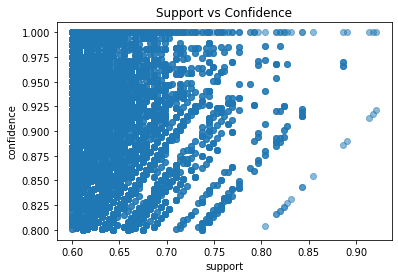

In [72]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

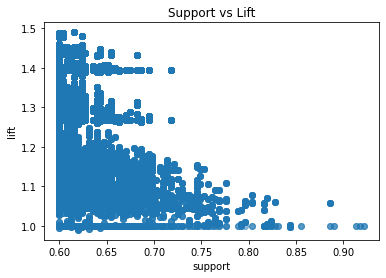

In [73]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

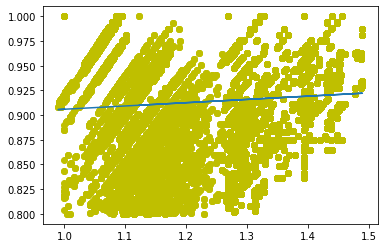

In [74]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Association Analysis - Stable/Exclusive

In [75]:
gent_class = 'exclusive'

In [76]:
df_class = df3[df3['typology'].isin([ '7', '8', '9'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [77]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

12 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (high_pdmt_medhhinc_00)
1 itemset(s) from tree conditioned on items (aboverm_real_mhval_00)
2 itemset(s) from tree conditioned on items (aboverm_real_mrent_12)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, high_pdmt_medhhinc_00)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_12, aboverm_real_mhval_00)
2 itemset(s) from tree conditioned on items (aboverm_real_mrent_00)
0 itemset(s) from tree conditioned on items (aboverm_real_mrent_00, aboverm_real_mhval_00)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_00, high_pdmt_medhhinc_00)
2 itemset(s) from tree conditioned on items (aboverm_per_col_00)
0 itemset(s) from tree conditioned on items (aboverm_per_col_00, high_pdmt_medhhinc_00)
0 itemset(s) from tree conditioned on items (aboverm_per_col_00, aboverm_real_mhval_00)
2 itemset(s) from tree conditioned on items (aboverm_real_mhval_90)
0 items

In [78]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

In [79]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [80]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mhval_00),(high_pdmt_medhhinc_00),0.826446,0.900826,0.743802,0.900000,0.999083,-0.000683,0.991736
1,(high_pdmt_medhhinc_00),(aboverm_real_mhval_00),0.900826,0.826446,0.743802,0.825688,0.999083,-0.000683,0.995650
2,(aboverm_real_mrent_12),(high_pdmt_medhhinc_00),0.793388,0.900826,0.752066,0.947917,1.052274,0.037361,1.904132
3,(high_pdmt_medhhinc_00),(aboverm_real_mrent_12),0.900826,0.793388,0.752066,0.834862,1.052274,0.037361,1.251148
4,(aboverm_real_mrent_12),(aboverm_real_mhval_00),0.793388,0.826446,0.657025,0.828125,1.002031,0.001332,1.009767
5,"(aboverm_real_mrent_12, aboverm_real_mhval_00)",(high_pdmt_medhhinc_00),0.657025,0.900826,0.623967,0.949686,1.054238,0.032102,1.971074
6,"(aboverm_real_mrent_12, high_pdmt_medhhinc_00)",(aboverm_real_mhval_00),0.752066,0.826446,0.623967,0.829670,1.003901,0.002425,1.018928
7,"(aboverm_real_mhval_00, high_pdmt_medhhinc_00)",(aboverm_real_mrent_12),0.743802,0.793388,0.623967,0.838889,1.057350,0.033843,1.282417
8,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.826446,0.723140,0.694215,0.840000,1.161600,0.096578,1.730372
9,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.723140,0.826446,0.694215,0.960000,1.161600,0.096578,4.338843


In [81]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

In [82]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [83]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_real_mhval_00),(high_pdmt_medhhinc_00),0.826446,0.900826,0.743802,0.900000,0.999083,-0.000683,0.991736
1,(high_pdmt_medhhinc_00),(aboverm_real_mhval_00),0.900826,0.826446,0.743802,0.825688,0.999083,-0.000683,0.995650
2,(aboverm_real_mrent_12),(high_pdmt_medhhinc_00),0.793388,0.900826,0.752066,0.947917,1.052274,0.037361,1.904132
3,(high_pdmt_medhhinc_00),(aboverm_real_mrent_12),0.900826,0.793388,0.752066,0.834862,1.052274,0.037361,1.251148
4,(aboverm_real_mrent_12),(aboverm_real_mhval_00),0.793388,0.826446,0.657025,0.828125,1.002031,0.001332,1.009767
5,"(aboverm_real_mrent_12, aboverm_real_mhval_00)",(high_pdmt_medhhinc_00),0.657025,0.900826,0.623967,0.949686,1.054238,0.032102,1.971074
6,"(aboverm_real_mrent_12, high_pdmt_medhhinc_00)",(aboverm_real_mhval_00),0.752066,0.826446,0.623967,0.829670,1.003901,0.002425,1.018928
7,"(aboverm_real_mhval_00, high_pdmt_medhhinc_00)",(aboverm_real_mrent_12),0.743802,0.793388,0.623967,0.838889,1.057350,0.033843,1.282417
8,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.826446,0.723140,0.694215,0.840000,1.161600,0.096578,1.730372
9,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.723140,0.826446,0.694215,0.960000,1.161600,0.096578,4.338843


In [84]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(aboverm_real_mrent_12),(high_pdmt_medhhinc_00),0.793388,0.900826,0.752066,0.947917,1.052274,0.037361,1.904132
3,(high_pdmt_medhhinc_00),(aboverm_real_mrent_12),0.900826,0.793388,0.752066,0.834862,1.052274,0.037361,1.251148
4,(aboverm_real_mrent_12),(aboverm_real_mhval_00),0.793388,0.826446,0.657025,0.828125,1.002031,0.001332,1.009767
5,"(aboverm_real_mrent_12, aboverm_real_mhval_00)",(high_pdmt_medhhinc_00),0.657025,0.900826,0.623967,0.949686,1.054238,0.032102,1.971074
6,"(aboverm_real_mrent_12, high_pdmt_medhhinc_00)",(aboverm_real_mhval_00),0.752066,0.826446,0.623967,0.829670,1.003901,0.002425,1.018928
7,"(aboverm_real_mhval_00, high_pdmt_medhhinc_00)",(aboverm_real_mrent_12),0.743802,0.793388,0.623967,0.838889,1.057350,0.033843,1.282417
8,(aboverm_real_mhval_00),(aboverm_real_mrent_00),0.826446,0.723140,0.694215,0.840000,1.161600,0.096578,1.730372
9,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.723140,0.826446,0.694215,0.960000,1.161600,0.096578,4.338843
11,"(aboverm_real_mhval_00, high_pdmt_medhhinc_00)",(aboverm_real_mrent_00),0.743802,0.723140,0.619835,0.833333,1.152381,0.081962,1.661157
13,"(high_pdmt_medhhinc_00, aboverm_real_mrent_00)",(aboverm_real_mhval_00),0.632231,0.826446,0.619835,0.980392,1.186275,0.097329,8.851240


In [85]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(high_pdmt_medhhinc_00, aboverm_real_mrent_00)",(aboverm_real_mhval_00),0.632231,0.826446,0.619835,0.980392,1.186275,0.097329,8.851240
27,(aboverm_per_col_18),(aboverm_per_col_00),0.677686,0.706612,0.636364,0.939024,1.328912,0.157503,4.811570
9,(aboverm_real_mrent_00),(aboverm_real_mhval_00),0.723140,0.826446,0.694215,0.960000,1.161600,0.096578,4.338843
19,(aboverm_real_mrent_90),(aboverm_real_mhval_90),0.669421,0.698347,0.611570,0.913580,1.308204,0.144082,3.490555
31,(aboverm_per_col_18),(aboverm_real_mhval_18),0.677686,0.677686,0.611570,0.902439,1.331648,0.152312,3.303719
30,(aboverm_real_mhval_18),(aboverm_per_col_18),0.677686,0.677686,0.611570,0.902439,1.331648,0.152312,3.303719
23,(aboverm_per_col_90),(aboverm_per_col_00),0.685950,0.706612,0.623967,0.909639,1.287325,0.139266,3.246832
26,(aboverm_per_col_00),(aboverm_per_col_18),0.706612,0.677686,0.636364,0.900585,1.328912,0.157503,3.242100
22,(aboverm_per_col_00),(aboverm_per_col_90),0.706612,0.685950,0.623967,0.883041,1.287325,0.139266,2.685124
20,(aboverm_real_mhval_90),(aboverm_real_mrent_90),0.698347,0.669421,0.611570,0.875740,1.308204,0.144082,2.660370
